# Import and paths

In [88]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [89]:
DATA = 'figer'
FAMILY = {
  'bbn' : [
          'CONTACT_INFO',
          'EVENT',
          'FACILITY',
          'GPE',
          'LOCATION',
          'ORGANIZATION',
          'PRODUCT',
          'SUBSTANCE',
          'WORK_OF_ART'],
  'figer' : ['art',
            'broadcast',
            'building',
            'computer',
            'education',
            'event',
            'finance',
            'geography',
            'government',
            'internet',
            'living_thing',
            'location',
            'medicine',
            'metropolitan_transit',
            'organization',
            'people',
            'person',
            'product',
            'rail',
            'religion',
            'transportation',
            'visual_art'],
  'ontonotes_shimaoka': [
          'location/geography',
          'location/structure',
          'location/transit',
          'organization/company',
          'other/art',
          'other/event',
          'other/health',
          'other/language',
          'other/living_thing',
          'other/product',
          'person/artist'
  ]
}

SUBSET = [10, 20, 40]
KB_MODE = ['bottom_up', 'top_down', 'hybrid']
if DATA != 'ontonotes_shimaoka':
  KB_MODE.append('horizontal')
METRIC = ['precision', 'recall', 'f1']
PROJECTOR = ['classifier', 'box', 'kenn_bottom_up', 'kenn_top_down', 'kenn_hybrid', 'kenn_horizontal']

# set paths
# METRICS_FILE_PATH = f'../incremental/results/wandb_export/{DATA}/metrics_aggregated.csv'
METRICS_FILE_PATH = f'../incremental/results/wandb_export/{DATA}/metrics.csv'
# METRICS_FILE_PATH = './metrics.csv'
FIGURES_PATH = f'./figures/{DATA}'
TITLE = {
  'bbn' : 'BBN',
  'figer' : 'FIGER',
  'ontonotes_shimaoka' : 'OntoNotes'
}


# Read metrics

In [90]:
df_metrics = pd.read_csv(METRICS_FILE_PATH)
df_metrics['projector'] =df_metrics['projector'].apply(lambda x: x.replace('_adapter_bert_ms', ''))
df_metrics.fillna(0, inplace=True)
df_metrics

,metric,projector,instance,family,subset,precision,recall,f1
0,test_incremental_only/macro_types,kenn_horizontal,2,art,10,0.029600,0.973684,0.057453
1,test_incremental_only/macro_example_exclusive,kenn_horizontal,2,art,10,0.973684,0.973684,0.973684
2,test_incremental/macro_example_exclusive,kenn_horizontal,2,art,10,0.987180,0.858974,0.918625
3,test_incremental_only/macro_example,kenn_horizontal,2,art,10,0.012874,0.012874,0.012874
4,test_incremental_art/macro_types,kenn_horizontal,2,art,10,0.707317,0.743590,0.725000
...,...,...,...,...,...,...,...,...
21973,test_incremental/macro_example,classifier,0,visual_art,40,0.010438,0.009916,0.010171
21974,test_pretraining/macro_types,classifier,0,visual_art,40,0.892029,0.864310,0.877950
21975,test_incremental_visual_art-color/macro_types,classifier,0,visual_art,40,0.291262,1.000000,0.451128
21976,test_incremental/macro_types,classifier,0,visual_art,40,0.645631,0.950000,0.768786


# Plot metrics

## Utils

In [80]:
def filter_df(df, row_filter={}, stat=None):
  df_filtered = df.copy()
  for key, value in row_filter.items():
    df_filtered = df_filtered[df_filtered[key] == value]
  
  if stat:
    cols_filtered = ['projector', 'metric', 'subset'] + [c for c in df_filtered.columns if c.endswith(f'/{stat}')]
    df_filtered = df_filtered[cols_filtered]
  return df_filtered
  
def plot_subsets(df, title):
  df_subset_10 = df[df['subset'] == 10]
  df_subset_20 = df[df['subset'] == 20]
  df_subset_40 = df[df['subset'] == 40]
  
  fig = plt.figure(figsize=(10,5))
  ax1_1 = fig.add_subplot(3,3,1)
  ax2_1 = fig.add_subplot(3,3,4)
  ax3_1 = fig.add_subplot(3,3,7)
  ax1_2 = fig.add_subplot(3,3,2)
  ax2_2 = fig.add_subplot(3,3,5)
  ax3_2 = fig.add_subplot(3,3,8)
  ax1_3 = fig.add_subplot(3,3,3)
  ax2_3 = fig.add_subplot(3,3,6)
  ax3_3 = fig.add_subplot(3,3,9)
  
  ax1_1.set_xlim((0, 1))
  ax2_1.set_xlim((0, 1))
  ax3_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax2_2.set_xlim((0, 1))
  ax3_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))
  ax2_3.set_xlim((0, 1))
  ax3_3.set_xlim((0, 1))

  # fake title
  ax1_2.set_title(title)

  sns.barplot(data=df_subset_10, orient='h', x='precision', y='projector', errorbar='sd', ax=ax1_1).set(xticklabels=[], xlabel=None, ylabel='5-shot')
  sns.barplot(data=df_subset_10, orient='h', x='recall', y='projector', errorbar='sd', ax=ax1_2).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_10, orient='h', x='f1', y='projector', errorbar='sd', ax=ax1_3).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_20, orient='h', x='precision', y='projector', errorbar='sd', ax=ax2_1).set(xticklabels=[], xlabel=None, ylabel='10-shot')
  sns.barplot(data=df_subset_20, orient='h', x='recall', y='projector', errorbar='sd', ax=ax2_2).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_20, orient='h', x='f1', y='projector', errorbar='sd', ax=ax2_3).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_40, orient='h', x='precision', y='projector', errorbar='sd', ax=ax3_1).set(ylabel='20-shot')
  sns.barplot(data=df_subset_40, orient='h', x='recall', y='projector', errorbar='sd', ax=ax3_2).set(yticklabels=[], ylabel=None)
  sns.barplot(data=df_subset_40, orient='h', x='f1', y='projector', errorbar='sd', ax=ax3_3).set(yticklabels=[], ylabel=None)
  plt.show()

def plot_family(df, title):
  
  fig = plt.figure(figsize=(10,2))
  ax1_1 = fig.add_subplot(1,3,1)
  ax1_2 = fig.add_subplot(1,3,2)
  ax1_3 = fig.add_subplot(1,3,3)
  
  ax1_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))

  # fake title
  ax1_2.set_title(title)  
  
  sns.barplot(data=df, orient='h', x='precision', y='projector', errorbar='sd', ax=ax1_1).set(xlabel=None, ylabel=None)
  sns.barplot(data=df, orient='h', x='recall', y='projector', errorbar='sd', ax=ax1_2).set(yticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df, orient='h', x='f1', y='projector', errorbar='sd', ax=ax1_3).set(yticklabels=[], xlabel=None, ylabel=None)
  plt.show()

def plot_summary_detailed(df, title, hue='projector'):  
  fig = plt.figure(figsize=(15,12))
  ax1_1 = fig.add_subplot(1,3,1)
  ax1_2 = fig.add_subplot(1,3,2)
  ax1_3 = fig.add_subplot(1,3,3)
  
  ax1_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))

  # fake title
  ax1_1.set_title('precision')  
  ax1_2.set_title(f'{title}\nrecall')  
  ax1_3.set_title('f1')

  sns.barplot(data=df, x='precision', y='family', hue=hue, orient='horizontal', errorbar='sd', errwidth=.1, ax=ax1_1).set(xlabel='precision', ylabel=None)
  sns.barplot(data=df, x='recall', y='family', hue=hue, orient='horizontal', errorbar='sd', ax=ax1_2).set(yticklabels=[], xlabel='recall', ylabel=None)
  sns.barplot(data=df, x='f1', y='family', hue=hue, orient='horizontal', errorbar='sd', ax=ax1_3).set(yticklabels=[], xlabel='f1', ylabel=None)
  # remove redundant legends
  ax1_3.legend().remove()
  ax1_2.legend().remove()
  plt.show()

def plot_summary_compressed(df, title, hue='projector', metric_col='f1', figsize=(15,12)):  
  fig = plt.figure(figsize=figsize)
  ax1_1 = fig.add_subplot(1,3,1)
  ax1_2 = fig.add_subplot(1,3,2)
  ax1_3 = fig.add_subplot(1,3,3)
  
  ax1_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))

  # fake title
  ax1_1.set_title('5-shot')  
  ax1_2.set_title(f"{title.replace('_0', '').replace('_1', '')}\n10-shot")  
  ax1_3.set_title('20-shot')
  
  # split df wrt to K-shots
  df_5 = filter_df(df, {'subset': 10})
  df_10 = filter_df(df, {'subset': 20})
  df_20 = filter_df(df, {'subset': 40})
  
  # bp_5 = sns.barplot(data=df_5, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar='sd', errcolor='.60', ax=ax1_1)
  bp_5 = sns.barplot(data=df_5, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar=None, ax=ax1_1)
  bp_5.set(xlabel='5-shot', ylabel=None)
  
  # bp_10 = sns.barplot(data=df_10, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar='sd', errcolor='.60', ax=ax1_2)
  bp_10 = sns.barplot(data=df_10, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar=None, ax=ax1_2)
  bp_10.set(yticklabels=[], xlabel='10-shot', ylabel=None)
  
  # bp_20 = sns.barplot(data=df_20, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar='sd', errcolor='.60', ax=ax1_3)
  bp_20 = sns.barplot(data=df_20, x=metric_col, y='family', hue=hue, orient='horizontal', errorbar=None, ax=ax1_3)
  bp_20.set(yticklabels=[], xlabel='20-shot', ylabel=None)
  
  # add values to bars
  for bp in [bp_5, bp_10, bp_20]:
    for container in bp.containers:
      # container.datavalues = [round(x, 3) for x in container.datavalues]
      bp.bar_label(container, padding=5, fmt='%.3f', fontsize=7)

  # remove redundant legends
  ax1_3.legend().remove()
  ax1_1.legend().remove()

  # adjust legend
  ax1_2.legend(title='')
  sns.move_legend(ax1_2, 'lower center',bbox_to_anchor=(.5, -.1), ncol=len(container.get_children()))
  filepath = os.path.join(FIGURES_PATH, 'bars_performance')
  os.makedirs(filepath, exist_ok=True)
  filepath = os.path.join(filepath, title.replace(':', '_').replace(' ', '_'))
  plt.savefig(filepath)
  plt.show()
  

## Family over subsets

### Macro types
**metric:** test_incremental_only/macro_types

In [ ]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_subsets(df_filtered, title=title)



### Macro example
**metric:** test_incremental_only/macro_example_exclusive

In [ ]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'metric' : 'test_incremental_only/macro_example_exclusive'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_subsets(df_filtered, title=title)



### Macro types for each type
**metric:** test_incremental_{family}-{subtype}/macro_types

In [ ]:
for family in FAMILY[DATA]:
  # print('_'*50)
  metrics = set(df_metrics[df_metrics['metric'].apply(lambda x: x.startswith(f'test_incremental_{family}-'))]['metric'])
  for metric in metrics:
    row_filter = {
    'family' : family,
    'metric' : metric
    }
    df_filtered = filter_df(df_metrics, row_filter)
    # print('_'*50)
    # print(family)
    subtype = metric.split('-')[-1].split('/')[0]
    title = f'/{family}/{subtype}'
    plot_subsets(df_filtered, title=title)



In [ ]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'subset' : 10,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_family(df_filtered, title=title)



In [ ]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'subset' : 20,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_family(df_filtered, title=title)



## Summary

### Detailed: Precision-Recall-F1, divided by family, for each K-shot

In [ ]:
for subset in [10,20,40]:
  row_filter = {
  # 'family' : family,
  'subset' : subset,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  title = f'{int(subset / 2)}-shot'
  plot_summary_detailed(df_filtered, title)



### Compressed: F1, divided by family, for each K-shot (all-in-one figure)

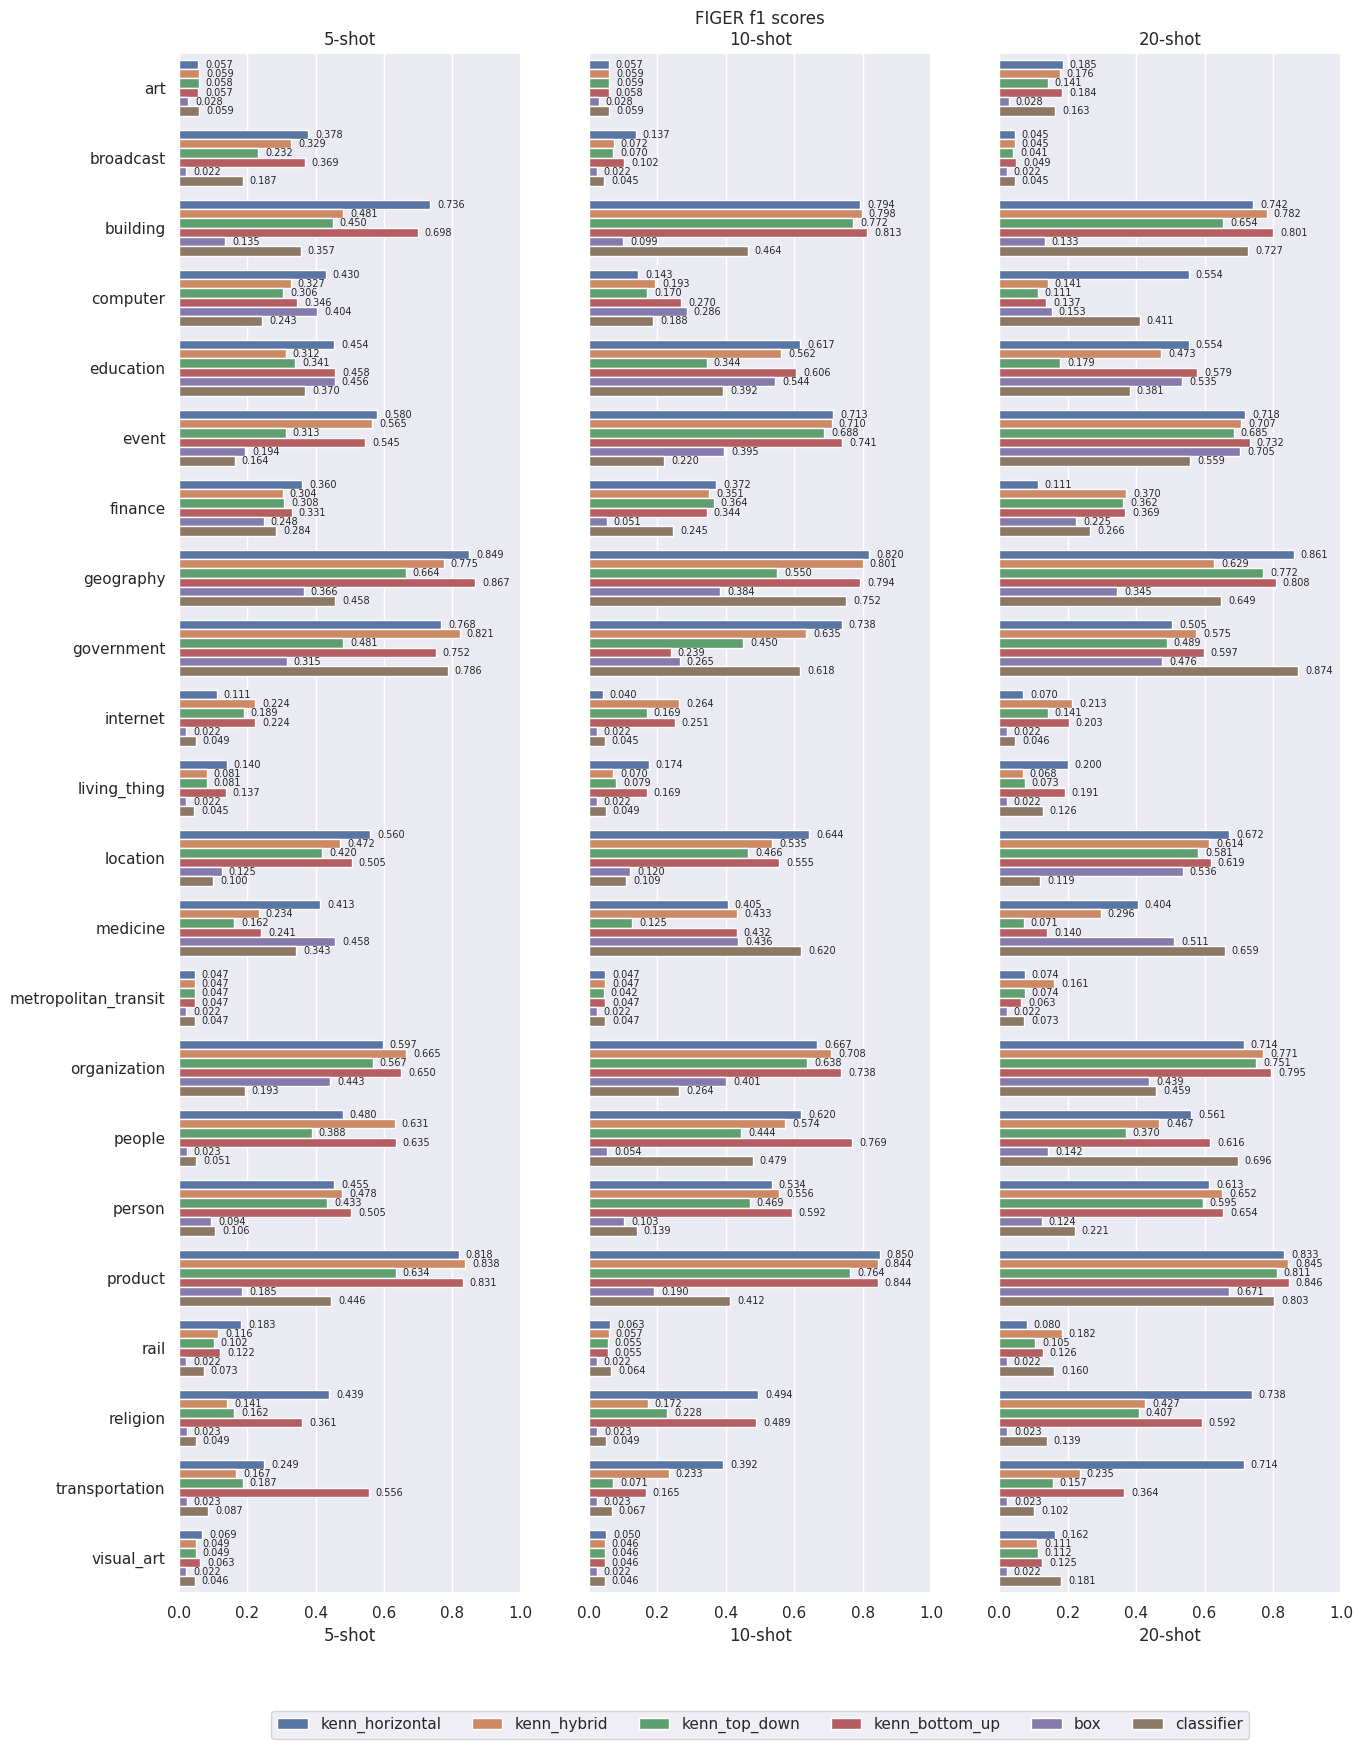

In [11]:
# metric_cols = ['precision', 'recall', 'f1']
metric_cols = ['f1']
# figsize = (15, 12) # bbn
# figsize = (15, 12) # ontonotes
figsize = (15, 20) # figer
for metric_col in metric_cols:
  row_filter = {
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  title = f'{TITLE[DATA]} {metric_col} scores'
  plot_summary_compressed(df_filtered, title, metric_col=metric_col, figsize=figsize)

ONLY FOR FIGER

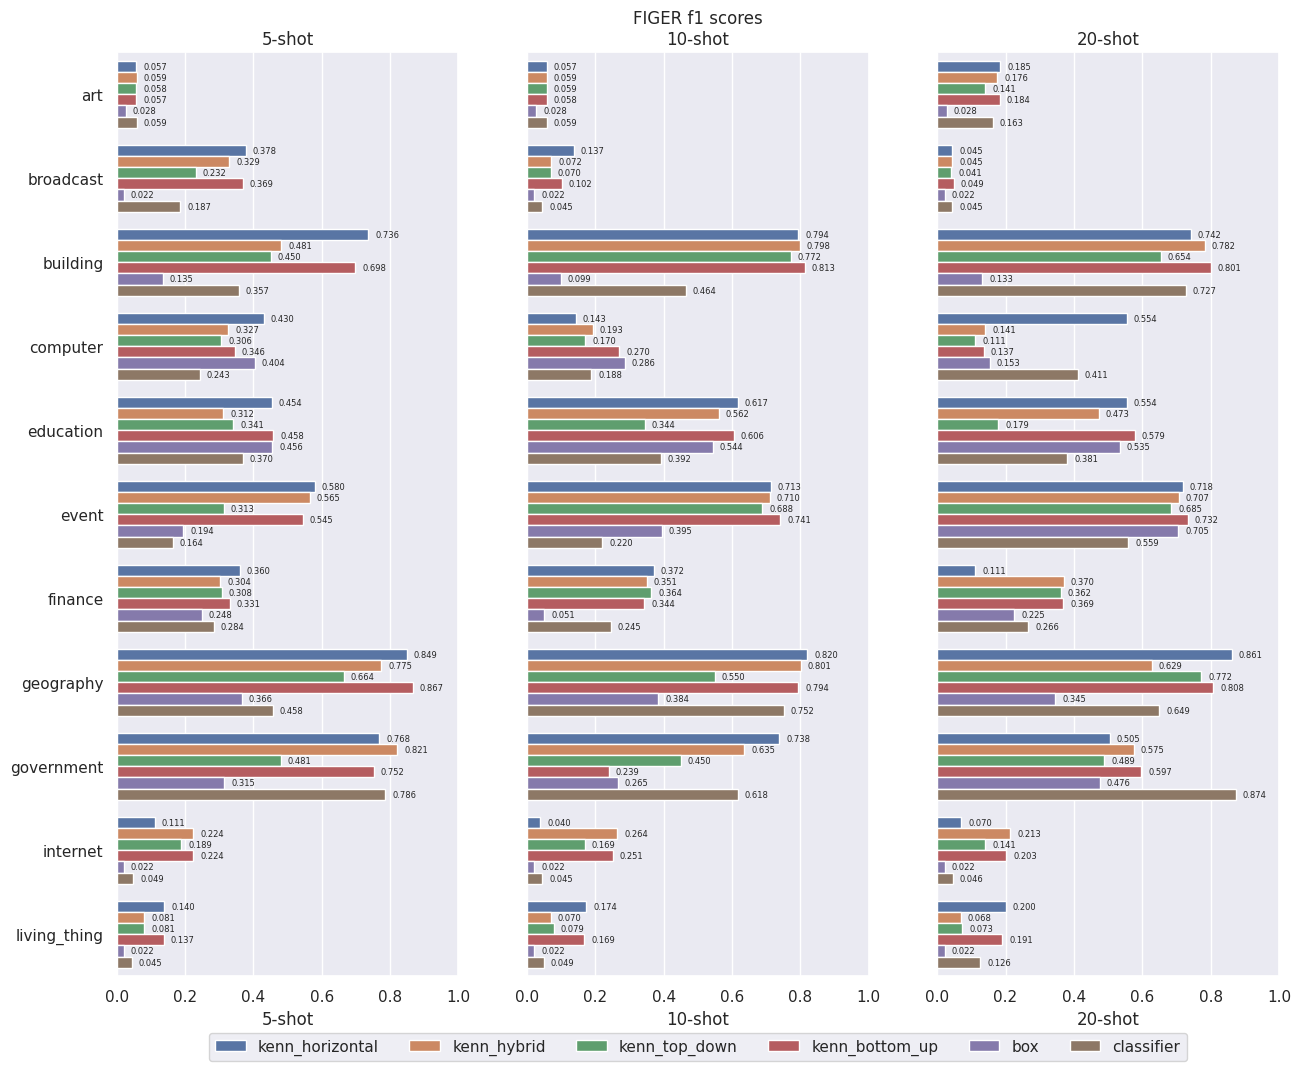

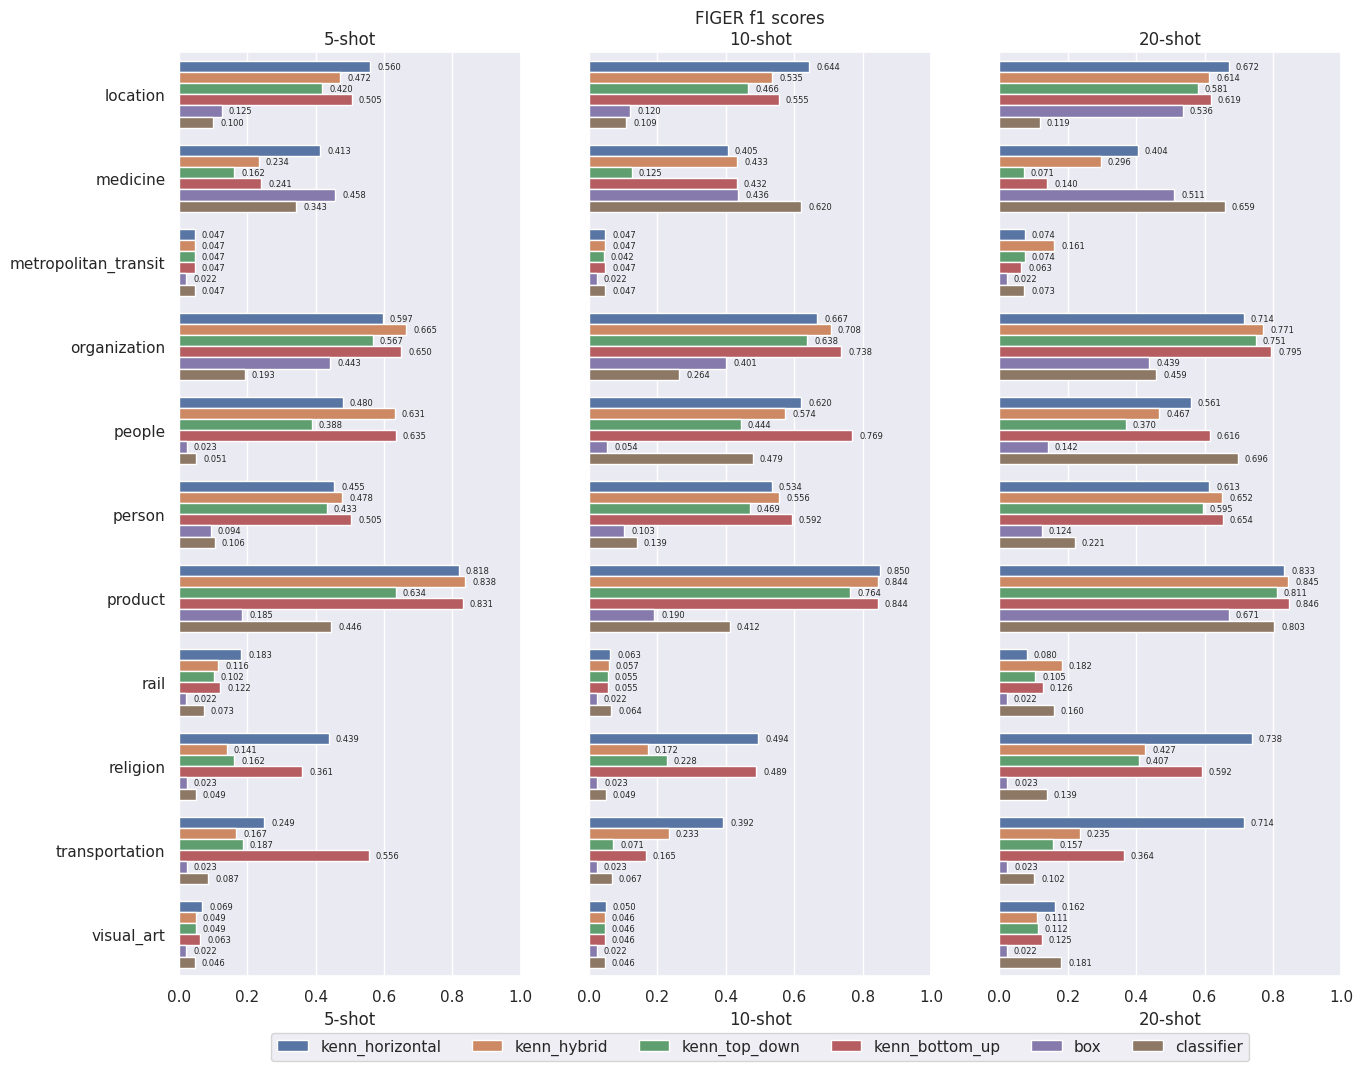

In [13]:
# metric_cols = ['precision', 'recall', 'f1']
metric_cols = ['f1']
figsize = (15, 12) # figer
families = sorted(list(set(df_metrics['family'].values)))
n_split = len(families)//2
families_1 = families[:n_split]
families_2 = families[n_split:]
for i_family, families in enumerate([families_1, families_2]):
  df_metrics_ = df_metrics[df_metrics['family'].isin(families)]
  for metric_col in metric_cols:
    row_filter = {
    'metric' : 'test_incremental_only/macro_types'
    }
    df_filtered = filter_df(df_metrics_, row_filter)
    title = f'{TITLE[DATA]} {metric_col} scores_{i_family}'
    plot_summary_compressed(df_filtered, title, metric_col=metric_col, figsize=figsize)

### Table F1 of single types aggregated

In [91]:
# get columns
metrics = list(df_metrics['metric'].value_counts().keys())
metrics_single_types = []
for metric in metrics:
  # if the metric is referred to a single type
  if metric.startswith('test_incremental') \
    and not metric.startswith('test_incremental_only') \
    and not metric.startswith('test_incremental/'):
    for family in FAMILY[DATA]:
      # exclude metrics that aggregate father and sons
      family_str = family.replace('/', '-')
      if family_str in metric and not metric.startswith(f"test_incremental_{family_str}/"):
        metrics_single_types.append(metric)
metrics_single_types = list(set(metrics_single_types))
# filter
df_f1_single_types = df_metrics[df_metrics['metric'].isin(metrics_single_types)].drop('instance', axis=1)
# compute stats 
df_f1_mean = df_f1_single_types.groupby(['projector', 'subset']).mean().reset_index().sort_values(['subset', 'projector'])
df_f1_std = df_f1_single_types.groupby(['projector', 'subset']).std().reset_index().sort_values(['subset', 'projector'])
# recompute f1 starting from averaged precision and recall
df_f1_mean['f1'] = 2 * df_f1_mean['precision'] * df_f1_mean['recall'] / (df_f1_mean['precision'] + df_f1_mean['recall'])
# change colnames and convert subset to k-shot
df_f1_mean.columns = ['projector', 'shots', 'precision/mean', 'recall/mean', 'f1/mean']
df_f1_std.columns = ['projector', 'shots', 'precision/std', 'recall/std', 'f1/std']
df_f1_mean['shots'] = df_f1_mean['shots'].apply(lambda x: int(x/2))
df_f1_std['shots'] = df_f1_std['shots'].apply(lambda x: int(x/2))
# merge dfs
df_f1_agg = pd.merge(left=df_f1_mean, right=df_f1_std, left_on=['projector', 'shots'], right_on=['projector', 'shots'])
# remove columns
df_f1_agg = df_f1_agg.drop(['precision/mean', 'recall/mean', 'precision/std', 'recall/std'], axis=1)
# transpose
rows_t = defaultdict(dict)
for i, row in df_f1_agg.iterrows():
  rows_t[row['projector']].update({
    'projector': row['projector'],
    f"{row['shots']}/f1/mean" : round(row['f1/mean'], 3),
    f"{row['shots']}/f1/std" : round(row['f1/std'], 3),
  })
df_f1_agg_t = pd.DataFrame(rows_t.values())
df_f1_agg_t
# save
out_dir = './tables'
os.makedirs(out_dir, exist_ok=True)
out_file = f'{DATA}_macro_types.csv'
df_f1_agg_t.to_csv(os.path.join(out_dir, out_file), index=False)

# Compute stats

### Utils

In [6]:
def compute_comparison(df):
  df_copy = df.copy()
  for metric in METRIC:
    delta_key = f'delta_{metric}'
    kenn_key = f'kenn_{metric}'
    other_key = f'other_{metric}'
    df_copy[delta_key] = df_copy[kenn_key] - df_copy[other_key]

    perc_key = f'perc_delta_{metric}'
    df_copy[perc_key] = round(df_copy[delta_key] / df_copy[other_key] * 100, 3)
  return df_copy.fillna(0)

def compare_stats(df, additional_columns={}):
  columns = list(additional_columns.keys()) + ['metric', 'kenn_projector', 'other_projector', 'n_kenn_better', 'total']
  df_stats = pd.DataFrame(columns=columns)
  for other_projector in ['box', 'classifier']:
    print('#'*5, f'kenn vs {other_projector}', '#'*5)

    for metric in METRIC:
      print('#'*3, metric.upper(), '#'*3)
      
      key_delta = f'delta_{metric}'
      key_perc_delta = f'perc_delta_{metric}'
      df_filtered = df[df['other_projector'] == other_projector]
      
      # compute global kenn
      n_kenn_better = len(df_filtered[df_filtered[key_delta] > 0])
      n_total = len(df_filtered)
      perc = round(n_kenn_better / n_total * 100, 2)
      mean_perc_delta =  round(df_filtered[key_perc_delta].mean(), 2)
      print(f'- all: {n_kenn_better}/{n_total} = {perc}% (mean delta: {mean_perc_delta}%)')

      # prepare row
      row = {'other_projector': other_projector, 'metric': metric}

      # compute single kenn
      for kb_mode in KB_MODE:
        kenn_projector = f'kenn_{kb_mode}'
        df_filtered_kenn = df_filtered[df_filtered['kenn_projector'] == kenn_projector]
        n_kenn_better = len(df_filtered_kenn[df_filtered_kenn[key_delta] > 0])
        n_total = len(df_filtered_kenn)
        perc = round(n_kenn_better / n_total * 100, 2)
        mean_perc_delta =  round(df_filtered_kenn[key_perc_delta].mean(), 2)

        # update row
        row['kenn_projector'] = kb_mode
        row['n_kenn_better'] = int(n_kenn_better)
        row['total'] = n_total
        row['perc_delta'] = mean_perc_delta
        print(f'- {kb_mode}: {n_kenn_better}/{n_total} = {perc}% (mean delta: {mean_perc_delta}%)')
        df_stats = df_stats.append(row, ignore_index=True)
    print()
  for k, v in additional_columns.items():
    df_stats[k] = v
  return df_stats.fillna(0)
    

### KENN vs others

We are comparing results aggregated by different criteria.

#### Global level

In [12]:
# create df comparison
df_comparison = pd.DataFrame(columns=['family', 'subset', 'kenn_projector', 'other_projector',
                                      'kenn_precision', 'kenn_recall', 'kenn_f1',
                                      'other_precision', 'other_recall', 'other_f1'])
for subset in SUBSET:
  for family in FAMILY[DATA]:
    row_filter = {
    'family' : family,
    'subset' : subset,
    'metric' : 'test_incremental_only/macro_types'
    }
    df_filtered = filter_df(df_metrics, row_filter).drop(['instance', 'subset'], axis=1)
    df_aggregated = df_filtered.groupby(by='projector').mean()
    kenn_projectors = [idx for idx in df_aggregated.index if 'kenn' in idx]
    other_projectors = [idx for idx in df_aggregated.index if 'kenn' not in idx]
    # iterate over combinations
    for kenn_projector in kenn_projectors:
      for other_projector in other_projectors:
        row_comparison = {
          'family' : family,
          'subset' : subset,
          'kenn_projector' : kenn_projector,
          'other_projector' : other_projector,
          'kenn_precision' : df_aggregated.loc[kenn_projector, 'precision'],
          'kenn_recall' : df_aggregated.loc[kenn_projector, 'recall'],
          'kenn_f1' : df_aggregated.loc[kenn_projector, 'f1'],
          'other_precision' : df_aggregated.loc[other_projector, 'precision'],
          'other_recall' : df_aggregated.loc[other_projector, 'recall'],
          'other_f1' :df_aggregated.loc[other_projector, 'f1'] 
        }
        df_comparison = df_comparison.append(row_comparison, ignore_index=True)

# compute comparison
df_comparison = compute_comparison(df_comparison)
# extract stats
df_stats = compare_stats(df_comparison)
df_stats

##### kenn vs box #####
### PRECISION ###
- all: 232/264 = 87.88% (mean delta: 575.02%)
- bottom_up: 59/66 = 89.39% (mean delta: 702.43%)
- top_down: 56/66 = 84.85% (mean delta: 370.51%)
- hybrid: 57/66 = 86.36% (mean delta: 530.01%)
- horizontal: 60/66 = 90.91% (mean delta: 697.11%)
### RECALL ###
- all: 95/264 = 35.98% (mean delta: 4.69%)
- bottom_up: 22/66 = 33.33% (mean delta: 5.25%)
- top_down: 27/66 = 40.91% (mean delta: 5.64%)
- hybrid: 24/66 = 36.36% (mean delta: 4.87%)
- horizontal: 22/66 = 33.33% (mean delta: 3.0%)
### F1 ###
- all: 233/264 = 88.26% (mean delta: 392.16%)
- bottom_up: 59/66 = 89.39% (mean delta: 464.23%)
- top_down: 56/66 = 84.85% (mean delta: 276.49%)
- hybrid: 58/66 = 87.88% (mean delta: 362.22%)
- horizontal: 60/66 = 90.91% (mean delta: 465.68%)

##### kenn vs classifier #####
### PRECISION ###
- all: 188/264 = 71.21% (mean delta: 184.2%)
- bottom_up: 49/66 = 74.24% (mean delta: 231.62%)
- top_down: 38/66 = 57.58% (mean delta: 110.08%)
- hybrid: 50/66 = 75.

,metric,kenn_projector,other_projector,n_kenn_better,total,perc_delta
0,precision,bottom_up,box,59,66,702.43
1,precision,top_down,box,56,66,370.51
2,precision,hybrid,box,57,66,530.01
3,precision,horizontal,box,60,66,697.11
4,recall,bottom_up,box,22,66,5.25
5,recall,top_down,box,27,66,5.64
6,recall,hybrid,box,24,66,4.87
7,recall,horizontal,box,22,66,3.00
8,f1,bottom_up,box,59,66,464.23
9,f1,top_down,box,56,66,276.49


Compute per subsets

In [13]:
stats = {}
for subset in SUBSET:
  print('#'*7, f'{int(subset/2)}-shot', '#'*7)
  row_filter = {'subset': subset}
  df_comparison_filtered = filter_df(df_comparison, row_filter)
  stats[subset] = compare_stats(df_comparison_filtered, additional_columns=row_filter)
df_stats = pd.concat(stats.values())
df_stats

####### 5-shot #######
##### kenn vs box #####
### PRECISION ###
- all: 78/88 = 88.64% (mean delta: 673.01%)
- bottom_up: 20/22 = 90.91% (mean delta: 905.19%)
- top_down: 19/22 = 86.36% (mean delta: 423.5%)
- hybrid: 19/22 = 86.36% (mean delta: 628.47%)
- horizontal: 20/22 = 90.91% (mean delta: 734.89%)
### RECALL ###
- all: 23/88 = 26.14% (mean delta: 1.76%)
- bottom_up: 5/22 = 22.73% (mean delta: 2.75%)
- top_down: 7/22 = 31.82% (mean delta: 3.19%)
- hybrid: 6/22 = 27.27% (mean delta: 3.22%)
- horizontal: 5/22 = 22.73% (mean delta: -2.12%)
### F1 ###
- all: 78/88 = 88.64% (mean delta: 442.05%)
- bottom_up: 20/22 = 90.91% (mean delta: 564.59%)
- top_down: 19/22 = 86.36% (mean delta: 312.36%)
- hybrid: 19/22 = 86.36% (mean delta: 407.39%)
- horizontal: 20/22 = 90.91% (mean delta: 483.85%)

##### kenn vs classifier #####
### PRECISION ###
- all: 72/88 = 81.82% (mean delta: 256.09%)
- bottom_up: 18/22 = 81.82% (mean delta: 338.99%)
- top_down: 16/22 = 72.73% (mean delta: 154.19%)
- hybri

,subset,metric,kenn_projector,other_projector,n_kenn_better,total,perc_delta
0,10,precision,bottom_up,box,20,22,905.19
1,10,precision,top_down,box,19,22,423.50
2,10,precision,hybrid,box,19,22,628.47
3,10,precision,horizontal,box,20,22,734.89
4,10,recall,bottom_up,box,5,22,2.75
...,...,...,...,...,...,...,...
19,40,recall,horizontal,classifier,10,22,1.61
20,40,f1,bottom_up,classifier,15,22,72.40
21,40,f1,top_down,classifier,11,22,31.93
22,40,f1,hybrid,classifier,15,22,61.34


#### Family level

**NOTE:** *Global level* must be executed before the cell below

In [ ]:
stats = defaultdict(defaultdict)
for subset in SUBSET:
  print('#'*9, f'{int(subset/2)}-shot', '#'*9)
  for family in FAMILY[DATA]:
    print('#'*7, family, '#'*7)
    row_filter = {'subset': subset, 'family': family}
    df_comparison_filtered = filter_df(df_comparison, row_filter)
    stats[subset][family] = compare_stats(df_comparison_filtered, additional_columns=row_filter)

df_stats = pd.concat([pd.concat(v.values()) for v in stats.values()])
df_stats

Table

In [ ]:
# kenn vs other - k-shot
other_projector = 'box'
subset = 10
print(f'kenn vs {other_projector} - {subset}-shot')
row_filter = {'other_projector': other_projector, 'subset': subset}
df_comparison_filtered = filter_df(df_comparison, row_filter)
cols_delta = [c for c in df_comparison_filtered.columns if 'delta_' in c]
df_comparison_filtered[['family', 'kenn_projector'] + cols_delta]

Table improvements over subsets

In [ ]:
metric = 'test_incremental_only/macro_types'
cols = ['family', 'projector',
        'delta_precision_10_20', 'delta_precision_10_40', 'delta_precision_20_40',
        'delta_recall_10_20', 'delta_recall_10_40', 'delta_recall_20_40',
        'delta_f1_10_20', 'delta_f1_10_40', 'delta_f1_20_40']
df_comparison_subsets = pd.DataFrame(columns=cols)

for family in FAMILY[DATA]:
  for projector in PROJECTOR:
    row_filter = {'metric': metric, 'projector': projector, 'family': family}
    df_filtered = filter_df(df_metrics, row_filter)
    df_filtered_aggregated = df_filtered.groupby('subset').mean().drop('instance', axis=1)
    row = {'family': family,
          'projector': projector,
          'delta_precision_10_20': df_filtered_aggregated.loc[20, 'precision'] - df_filtered_aggregated.loc[10, 'precision'],
          'delta_precision_10_40': df_filtered_aggregated.loc[40, 'precision'] - df_filtered_aggregated.loc[10, 'precision'], 
          'delta_precision_20_40': df_filtered_aggregated.loc[40, 'precision'] - df_filtered_aggregated.loc[20, 'precision'],
          'delta_recall_10_20': df_filtered_aggregated.loc[20, 'recall'] - df_filtered_aggregated.loc[10, 'recall'],
          'delta_recall_10_40': df_filtered_aggregated.loc[40, 'recall'] - df_filtered_aggregated.loc[10, 'recall'],
          'delta_recall_20_40': df_filtered_aggregated.loc[40, 'recall'] - df_filtered_aggregated.loc[20, 'recall'],
          'delta_f1_10_20': df_filtered_aggregated.loc[20, 'f1'] - df_filtered_aggregated.loc[10, 'f1'],
          'delta_f1_10_40': df_filtered_aggregated.loc[40, 'f1'] - df_filtered_aggregated.loc[10, 'f1'],
          'delta_f1_20_40': df_filtered_aggregated.loc[40, 'f1'] - df_filtered_aggregated.loc[20, 'f1']}
    df_comparison_subsets = df_comparison_subsets.append(row, ignore_index=True)

df_comparison_subsets

Table improvements over cross-subsets (kenn-X-shot vs other-Y-shot)

In [ ]:
metric = 'test_incremental_only/macro_types'
cols = ['family', 'kenn_projector', 'other_projector',
        'delta_precision', 'delta_recall', 'delta_f1']
df_comparison_subsets = pd.DataFrame(columns=cols)
other_projector = 'classifier'
subset_kenn = 10
subset_other = 40
for family in FAMILY[DATA]:
  # for other_projector in ['classifier', 'box']:
    row_filter = {'metric': metric, 'projector': other_projector, 'family': family, 'subset': subset_other}
    df_filtered_other = filter_df(df_metrics, row_filter)
    df_filtered_other_aggregated = df_filtered_other.groupby('subset').mean().drop('instance', axis=1)
    for kb_mode in KB_MODE:
      kenn_projector = f'kenn_{kb_mode}'
      row_filter = {'metric': metric, 'projector': kenn_projector, 'family': family, 'subset': subset_kenn}
      df_filtered_kenn = filter_df(df_metrics, row_filter)
      df_filtered_kenn_aggregated = df_filtered_kenn.groupby('subset').mean().drop('instance', axis=1)
      
      row = {'family': family,
            'kenn_projector': kenn_projector,
            'other_projector': other_projector,
            'delta_precision': df_filtered_kenn_aggregated.loc[subset_kenn, 'precision'] - df_filtered_other_aggregated.loc[subset_other, 'precision'],
            'delta_recall': df_filtered_kenn_aggregated.loc[subset_kenn, 'recall'] - df_filtered_other_aggregated.loc[subset_other, 'recall'],
            'delta_f1': df_filtered_kenn_aggregated.loc[subset_kenn, 'f1'] - df_filtered_other_aggregated.loc[subset_other, 'f1']}
      df_comparison_subsets = df_comparison_subsets.append(row, ignore_index=True)


print(f'kenn {int(subset_kenn/2)}-shot > {other_projector} {int(subset_other/2)}-shot:')
print(f"PRECISION: {len(df_comparison_subsets[df_comparison_subsets['delta_precision'] > 0])}/{len(df_comparison_subsets)}")
print(f"RECALL: {len(df_comparison_subsets[df_comparison_subsets['delta_recall'] > 0])}/{len(df_comparison_subsets)}")
print(f"F1: {len(df_comparison_subsets[df_comparison_subsets['delta_f1'] > 0])}/{len(df_comparison_subsets)}")


#### Type level

##### Single

Compute comparison

In [7]:
# create df comparison
df_comparison = pd.DataFrame(columns=['family', 'subtype', 'subset', 'kenn_projector', 'other_projector',
                                      'kenn_precision', 'kenn_recall', 'kenn_f1',
                                      'other_precision', 'other_recall', 'other_f1'])
for subset in SUBSET:
  print('#'*11, f'{int(subset/2)}-shot', '#'*11)
  for family in FAMILY[DATA]:
    print('#'*9, family, '#'*9)
    family_key = family.replace('/', '-')
    metrics = set(df_metrics[df_metrics['metric'].apply(lambda x: x.startswith(f'test_incremental_{family_key}-'))]['metric'])
    for metric in metrics:
      subtype = metric.split('-')[-1].split('/')[0]
      print('#'*7, subtype, '#'*7)
      row_filter = {
      'family' : family,
      'metric' : metric,
      'subset' : subset
      }
      df_filtered = filter_df(df_metrics, row_filter)
      df_aggregated = df_filtered.groupby(by='projector').mean()
      kenn_projectors = [idx for idx in df_aggregated.index if 'kenn' in idx]
      other_projectors = [idx for idx in df_aggregated.index if 'kenn' not in idx]

      df_comparison_type = pd.DataFrame(columns=df_comparison.columns)
      # iterate over combinations
      for kenn_projector in kenn_projectors:
        for other_projector in other_projectors:
          row_comparison = {
            'family' : family,
            'subtype' : subtype,
            'subset' : subset,
            'kenn_projector' : kenn_projector,
            'other_projector' : other_projector,
            'kenn_precision' : df_aggregated.loc[kenn_projector, 'precision'],
            'kenn_recall' : df_aggregated.loc[kenn_projector, 'recall'],
            'kenn_f1' : df_aggregated.loc[kenn_projector, 'f1'],
            'other_precision' : df_aggregated.loc[other_projector, 'precision'],
            'other_recall' : df_aggregated.loc[other_projector, 'recall'],
            'other_f1' :df_aggregated.loc[other_projector, 'f1'] 
          }
          df_comparison = df_comparison.append(row_comparison, ignore_index=True)
          df_comparison_type = df_comparison_type.append(row_comparison, ignore_index=True)

      # compute comparison
      df_comparison_type = compute_comparison(df_comparison_type)
      # print stats
      # compare_stats(df_comparison_type) # comment for ontonotes_shimaoka
      print('-'*50)

df_comparison = compute_comparison(df_comparison)


########### 5-shot ###########
######### art #########
####### film #######
--------------------------------------------------
######### broadcast #########
####### tv_channel #######
--------------------------------------------------
######### building #########
####### dam #######
--------------------------------------------------
####### restaurant #######
--------------------------------------------------
####### airport #######
--------------------------------------------------
####### sports_facility #######
--------------------------------------------------
####### library #######
--------------------------------------------------
####### hospital #######
--------------------------------------------------
####### power_station #######
--------------------------------------------------
####### hotel #######
--------------------------------------------------
####### theater #######
--------------------------------------------------
######### computer #########
####### algorithm ##

Plot histogram of improvements (as percentages) of KENN vs other

In [14]:
def plot_improvements_hist(df, title='', metric='f1', kenn_projectors=['kenn_bottom_up', 'kenn_horizontal', 'kenn_hybrid', 'kenn_top_down'], bins=10, xlim=(-1, 1), ylim=None):

  fig, axes = plt.subplots(1, len(kenn_projectors), sharex=True, sharey=True, figsize=(10,4))
  fig.suptitle(title)
  for i, kenn_projector in enumerate(kenn_projectors):
    ax = axes[i]
    ax.set_title(kenn_projector.replace('kenn_', ''))
    row_filter = {'kenn_projector': kenn_projector}
    df_filtered = filter_df(df, row_filter)
    # draw plots
    hist_perc_delta = sns.histplot(data=df_filtered, x=f'delta_{metric}',
                                    bins=bins, binrange=(-1,1), ax=ax).set(xlim=xlim, ylim=ylim)
    xticks = [-1, -.75, -.5, 0, -.25, .25, .5, .75, 1]
    yticks = [int(x) for x in range(ylim[1] + 1) if x % 2 == 0]
    ax.set_xticks(xticks, minor=False)
    ax.set_yticks(yticks, minor=False)
    ax.tick_params(which="both", bottom=True, labelsize=5.5, direction='out', width=1)
    ax.axvline(0, color='red', linewidth=1)
    # if i == 0:
    ax.set_xlabel(f'Delta {metric}')
    # else:
    #   ax.set_xlabel(None)
  filepath = os.path.join(FIGURES_PATH, 'delta_hist')
  os.makedirs(filepath, exist_ok=True)
  plt.savefig(os.path.join(filepath, title.replace(':', '_').replace(' ', '_')))
  plt.show()


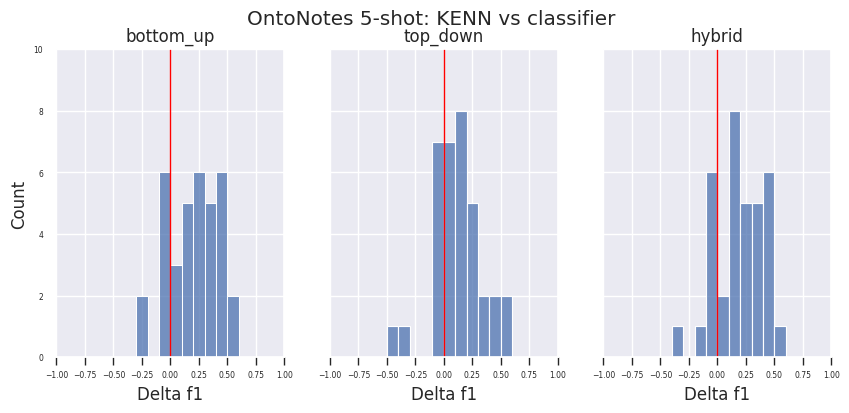

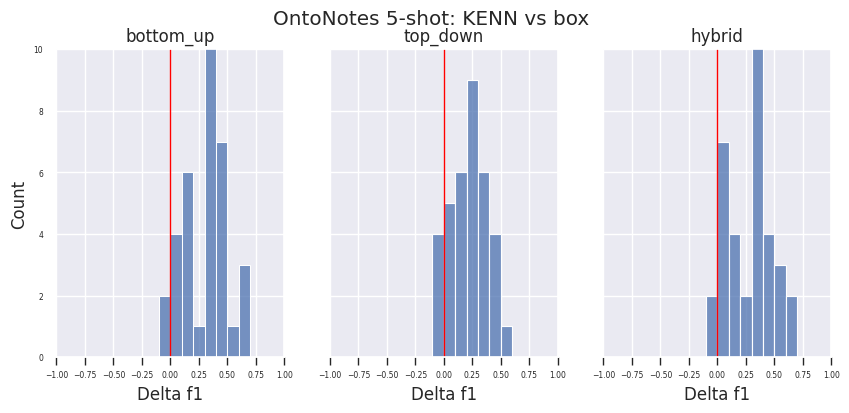

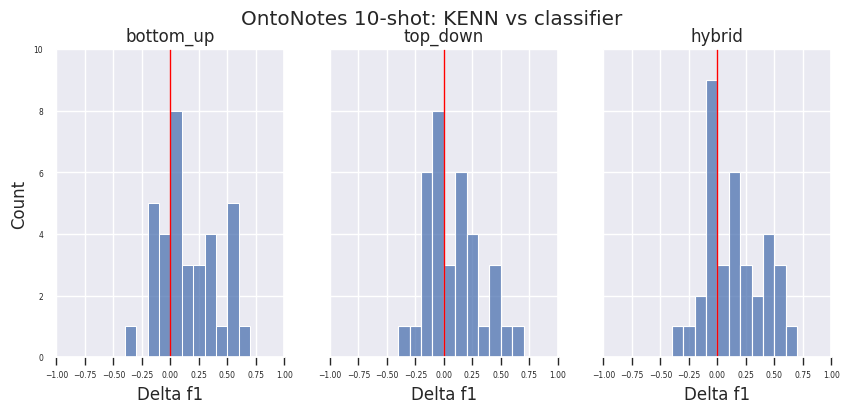

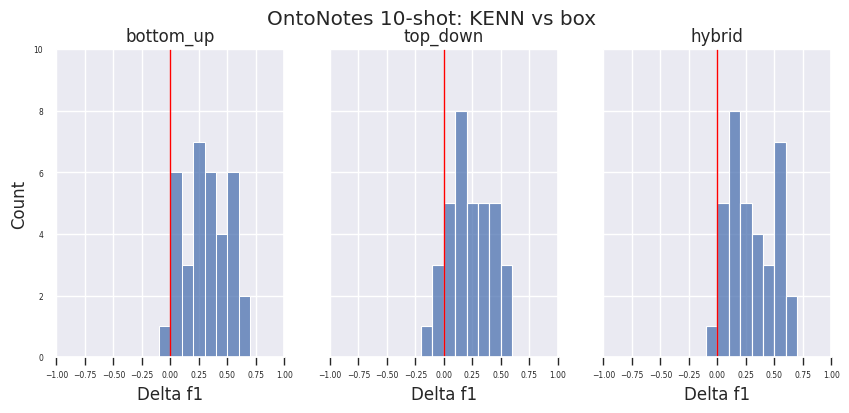

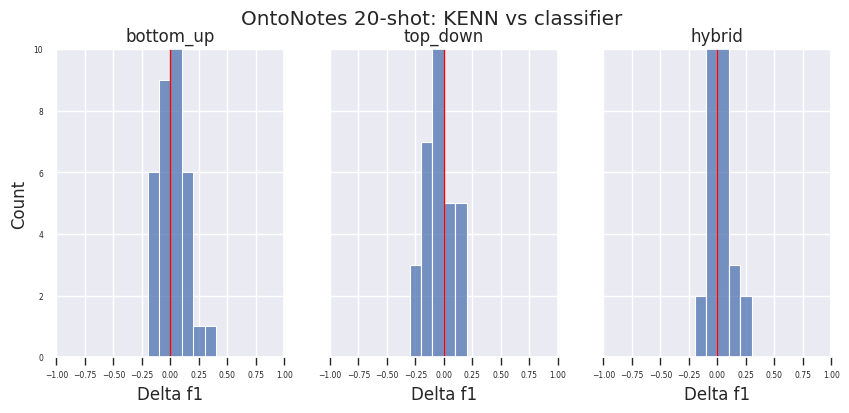

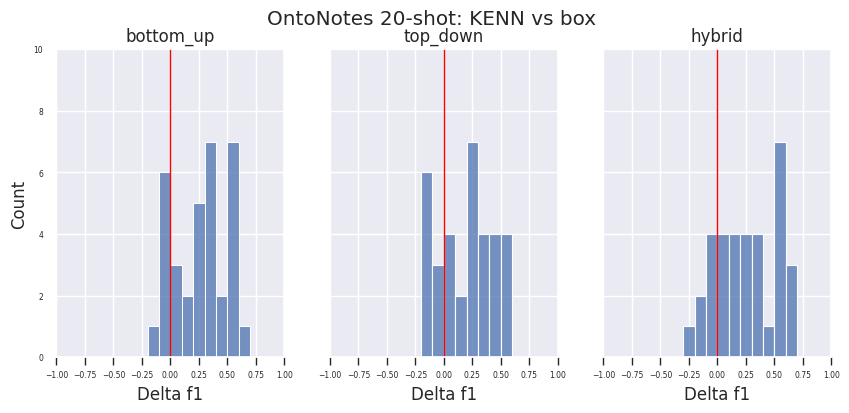

In [30]:
# TODO:
# 1) ylim in base a max bin tra box e classifier
# 2) usare perc_delta? rende di più a livello di magnitudine della percentuale, ma meno dal punto di vista del grafico (bins troppo sparsi)
subsets = [10, 20, 40]
other_projectors = ['classifier', 'box']
kenn_projectors = [f'kenn_{kb_mode}' for kb_mode in KB_MODE]
metric = 'f1'
bins = 20
ylim = (0, 10) # bbn
# ylim = (0, 22) # figer
# ylim = (0, 15) # ontonotes_shimaoka
for subset in subsets:
  for other_projector in other_projectors:
    row_filter = {
      'other_projector': other_projector,
      'subset': subset
    }
    df_comparison_filtered = filter_df(df_comparison, row_filter)
    title = f'{TITLE[DATA]} {int(subset/2)}-shot: KENN vs {other_projector}'
    # plot_improvements_hist(df_comparison_filtered, title=title, metric=metric, bins=bins, ylim=ylim)
    plot_improvements_hist(df_comparison_filtered, title=title, metric=metric, bins=bins, ylim=ylim, kenn_projectors=kenn_projectors)

##### Aggregated (all)

Compute comparison: add `deltas` and `perc_deltas` columns to the df

In [ ]:
stats = {}

for subset in SUBSET:
  print(f'||| {int(subset/2)}-shots |||')
  row_filter = {'subset': subset}
  df_comparison_filtered = filter_df(df_comparison, row_filter)
  stats[subset] = compare_stats(df_comparison_filtered, row_filter)
  print('-'*50)
df_stats = pd.concat(stats.values())

Barplots

In [ ]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
for other_projector in ['box', 'classifier']:
  fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
  plt.xlim((0,100))
  fig.suptitle(f'KENN vs {other_projector} - All new types')
  for i, metric in enumerate(METRIC):
    axes[i].set_title(metric)
    row_filter = {'other_projector': other_projector, 'metric': metric}
    df_stats_filtered = filter_df(df_stats, row_filter)
    # draw plots
    # bp_total = sns.barplot(data=df_stats_filtered, x='perc_total', y='subset', color='grey', alpha=.7, errorbar=None, ax=axes[i], orient='horizontal')
    bp_kenn_better = sns.barplot(data=df_stats_filtered, x='perc_kenn_better', y='subset', hue='kenn_projector', errorbar=None, ax=axes[i], orient='horizontal')
    # adjust plots
    # bp_total.set(ylabel=None, xlabel=None, yticklabels=['5-shot', '10-shot', '20-shot'])
    bp_kenn_better.set(ylabel=None, xlabel=None, yticklabels=['5-shot', '10-shot', '20-shot'])
    if i == 1:
      bp_kenn_better.set(xlabel=f'% kenn > {other_projector}')
    if i == 2:
      sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
    else:
      bp_kenn_better.legend_.remove()

  plt.show()

Table improvements

In [ ]:
# kenn vs other - k-shot
other_projector = 'box'
subset = 10
print(f'kenn vs {other_projector} - {subset}-shot')
row_filter = {'other_projector': other_projector, 'subset': subset}
df_comparison_filtered = filter_df(df_comparison, row_filter)
df_comparison_filtered['type'] = '/' + df_comparison_filtered['family'] + '/' + df_comparison_filtered['subtype']
cols_delta = [c for c in df_comparison_filtered.columns if 'delta_' in c]
df_comparison_filtered[['type', 'kenn_projector'] + cols_delta]

##### Aggregated by family

Compute comparison

In [15]:
stats = defaultdict(defaultdict)
# compute comparison
df_comparison = compute_comparison(df_comparison)
for subset in SUBSET:
  print('#'*9, f'{int(subset/2)}-shot', '#'*9)
  for family in FAMILY[DATA]:
    print('#'*7, family, '#'*7)
    row_filter = {'subset': subset, 'family': family}
    df_comparison_filtered = filter_df(df_comparison, row_filter)
    stats[subset][family] = compare_stats(df_comparison_filtered, additional_columns=row_filter)

df_stats = pd.concat([pd.concat(v.values()) for v in stats.values()])
df_stats

######### 5-shot #########
####### art #######
##### kenn vs box #####
### PRECISION ###
- all: 4/4 = 100.0% (mean delta: 113.39%)
- bottom_up: 1/1 = 100.0% (mean delta: 111.58%)
- top_down: 1/1 = 100.0% (mean delta: 113.38%)
- hybrid: 1/1 = 100.0% (mean delta: 117.07%)
- horizontal: 1/1 = 100.0% (mean delta: 111.53%)
### RECALL ###
- all: 0/4 = 0.0% (mean delta: -1.75%)
- bottom_up: 0/1 = 0.0% (mean delta: -2.63%)
- top_down: 0/1 = 0.0% (mean delta: -1.75%)
- hybrid: 0/1 = 0.0% (mean delta: 0.0%)
- horizontal: 0/1 = 0.0% (mean delta: -2.63%)
### F1 ###
- all: 4/4 = 100.0% (mean delta: 109.99%)
- bottom_up: 1/1 = 100.0% (mean delta: 108.22%)
- top_down: 1/1 = 100.0% (mean delta: 109.98%)
- hybrid: 1/1 = 100.0% (mean delta: 113.62%)
- horizontal: 1/1 = 100.0% (mean delta: 108.16%)

##### kenn vs classifier #####
### PRECISION ###
- all: 0/4 = 0.0% (mean delta: -1.75%)
- bottom_up: 0/1 = 0.0% (mean delta: -2.58%)
- top_down: 0/1 = 0.0% (mean delta: -1.75%)
- hybrid: 0/1 = 0.0% (mean delt

,subset,family,metric,kenn_projector,other_projector,n_kenn_better,total,perc_delta
0,10,art,precision,bottom_up,box,1,1,111.58
1,10,art,precision,top_down,box,1,1,113.38
2,10,art,precision,hybrid,box,1,1,117.07
3,10,art,precision,horizontal,box,1,1,111.53
4,10,art,recall,bottom_up,box,0,1,-2.63
...,...,...,...,...,...,...,...,...
19,40,visual_art,recall,horizontal,classifier,0,1,0.00
20,40,visual_art,f1,bottom_up,classifier,0,1,-31.17
21,40,visual_art,f1,top_down,classifier,0,1,-38.12
22,40,visual_art,f1,hybrid,classifier,0,1,-38.66


Barplots P/R/F1 per subset

In [ ]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
for subset in SUBSET:
  for other_projector in ['box', 'classifier']:
    fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
    fig.suptitle(f'{int(subset/2)}-shot: KENN vs {other_projector}')
    for i, metric in enumerate(METRIC):
      axes[i].set_title(metric)
      row_filter = {'other_projector': other_projector, 'subset': subset, 'metric': metric}
      df_stats_filtered = filter_df(df_stats, row_filter)
      # sns.barplot(data=df_stats_filtered, x='total', y='family', hue='kenn_projector', alpha=.3, errorbar=None)
      bp_total = sns.barplot(data=df_stats_filtered, x='total', y='family', color='grey', alpha=.7, errorbar=None, ax=axes[i])
      bp_kenn_better = sns.barplot(data=df_stats_filtered, x='n_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=axes[i])
      # bp_total = sns.barplot(data=df_stats_filtered, x='perc_total', y='family', color='grey', alpha=.7, errorbar=None, ax=axes[i])
      # bp_kenn_better = sns.barplot(data=df_stats_filtered, x='perc_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=axes[i])
      bp_total.set(ylabel=None, xlabel=None)
      bp_kenn_better.set(ylabel=None, xlabel=None)
      if i == 1:
        bp_kenn_better.set(xlabel=f'# kenn > {other_projector}')
      if i == 2:
        sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
      else:
        bp_kenn_better.legend_.remove()
    
    plt.show()

Barplots F1 all-in-one

In [ ]:
# df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
# df_stats['perc_total'] = 100
# metric = 'f1'
# families = sorted(list(set(df_stats['family'].values)))
# for other_projector in ['box', 'classifier']:
#   fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
#   fig.suptitle(f'{metric} scores: KENN vs {other_projector}')
#   for i, subset in enumerate(SUBSET):
#     axes[i].set_title(f'{int(subset/2)}-shot')
#     # filter df
#     row_filter = {'other_projector': other_projector, 'subset': subset, 'metric': metric}
#     df_stats_filtered = filter_df(df_stats, row_filter).fillna(0)
#     # plot
#     bp_total = sns.barplot(data=df_stats_filtered, x='total', y='family', color='grey', alpha=.7, errorbar=None, ax=axes[i])
#     bp_kenn_better = sns.barplot(data=df_stats_filtered, x='n_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=axes[i])
#     # adjust
#     bp_total.set(ylabel=None, xlabel=None)
#     bp_kenn_better.set(ylabel=None, xlabel=None)
#     if i == 1:
#       bp_kenn_better.set(xlabel=f'# kenn > {other_projector}')
#     if i == 2:
#       sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
#     else:
#       bp_kenn_better.legend_.remove()
    
#     # # add avg perc delta on bars
#     for container in bp_kenn_better.containers[1:]:
#       kenn_projector_label = container.get_label()
#       perc_deltas = []
#       for f in families:
#         perc_delta = filter_df(df_stats_filtered, {'kenn_projector': kenn_projector_label, 'family': f})['perc_delta'].max()
#         perc_deltas.append(perc_delta)
      
#       for idx, bar in enumerate(container.get_children()):
#         xy = bar.get_xy()
#         # xy = (xy[0] + bar.get_width() + .6, xy[1] + bar.get_height() + .12)
#         xy = (xy[0] + .6, xy[1] + bar.get_height() + .08)
#         axes[i].annotate(f'{perc_deltas[idx]}%',
#                         fontsize=6,
#                         color='black',
#                         xy=xy,
#                         xytext=(0, 3), # 3 points vertical offset
#                         textcoords="offset points",
#                         ha='center', va='bottom')

#   plt.show()

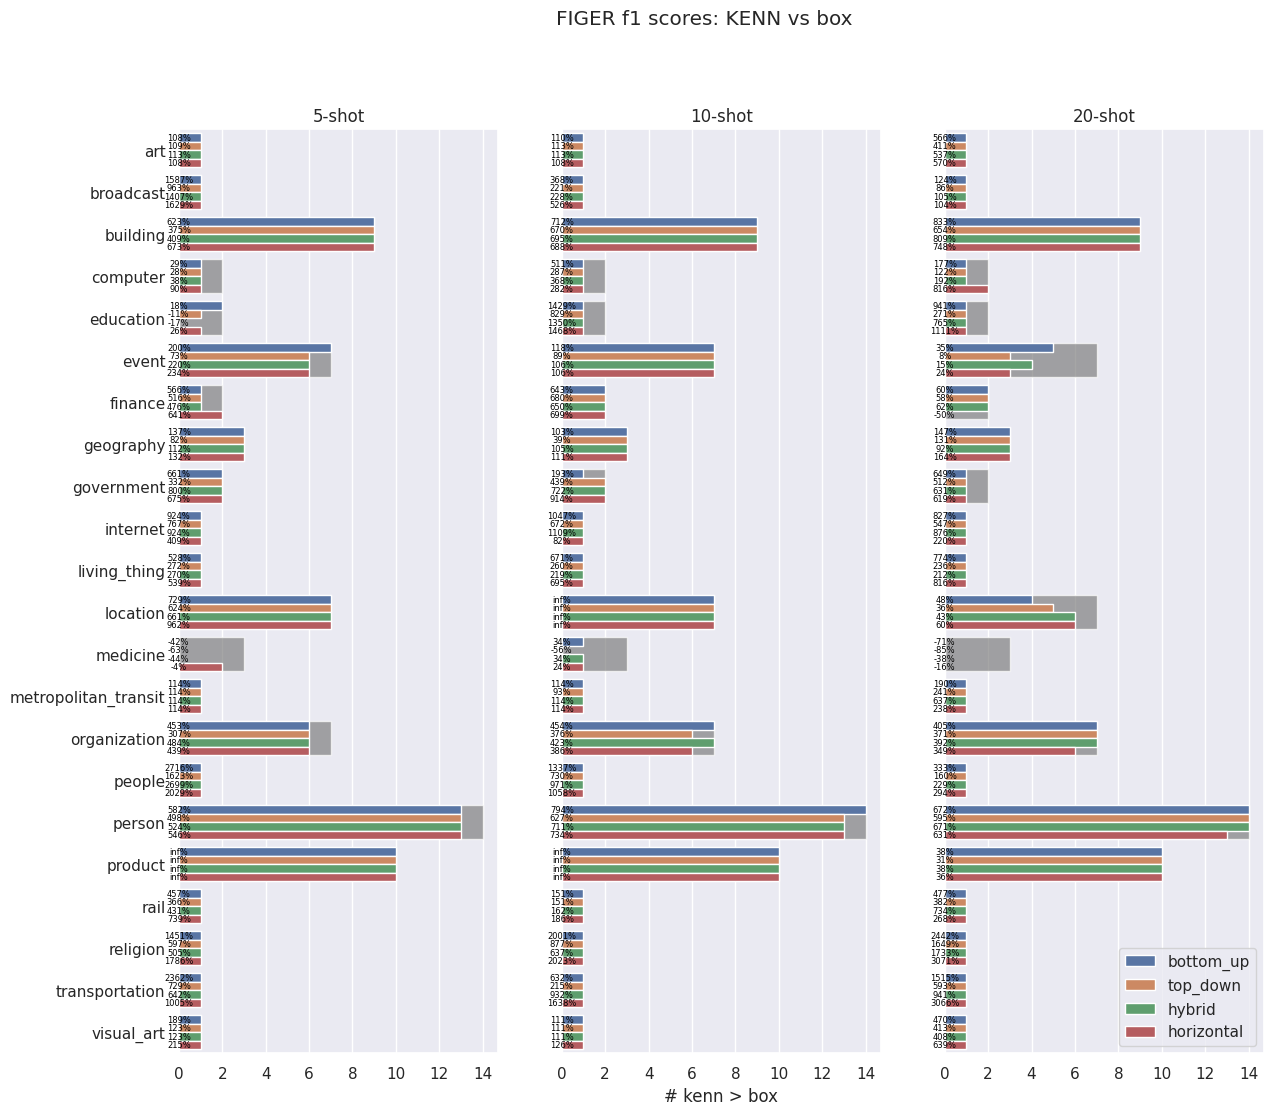

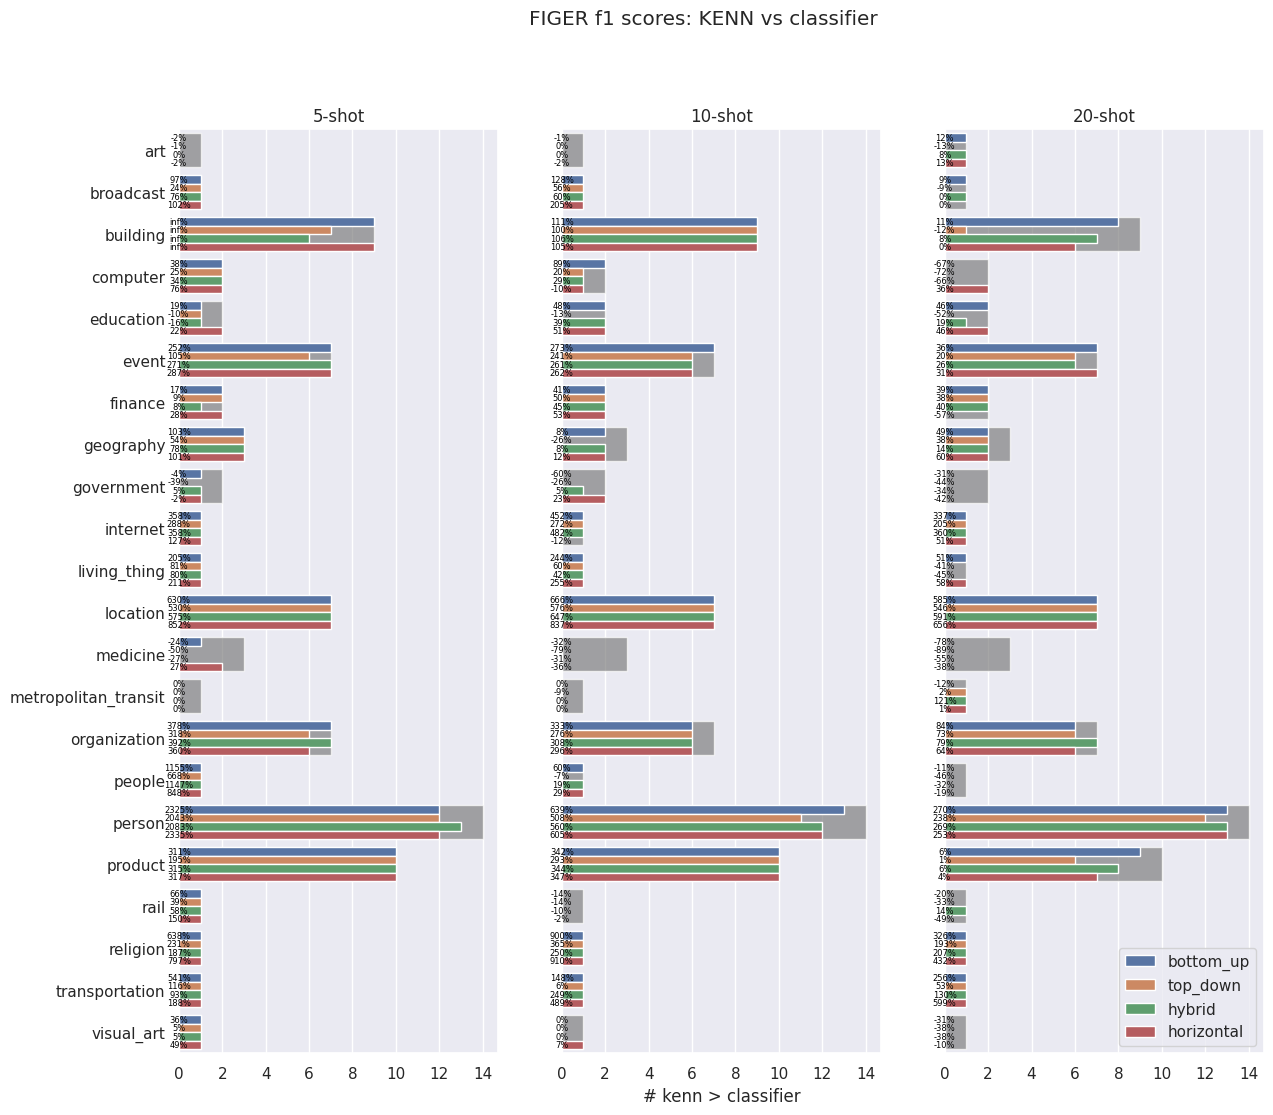

In [18]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
metric = 'f1'
# figsize = (11, 5) # bbn
figsize = (14, 12) # figer
# figsize = (11, 5) # ontontes_shimaoka
families = sorted(list(set(df_stats['family'].values)))
for other_projector in ['box', 'classifier']:
  fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=figsize)
  suptitle = f'{TITLE[DATA]} {metric} scores: KENN vs {other_projector}'
  fig.suptitle(suptitle)
  for i, subset in enumerate(SUBSET):
    ax = axes[i]
    title = f'{int(subset/2)}-shot'
    ax.set_title(title)
    # filter df
    row_filter = {'other_projector': other_projector, 'subset': subset, 'metric': metric}
    df_stats_filtered = filter_df(df_stats, row_filter).fillna(0)
    # plot
    bp_total = sns.barplot(data=df_stats_filtered, x='total', y='family', color='grey', alpha=.7, errorbar=None, ax=ax)
    bp_kenn_better = sns.barplot(data=df_stats_filtered, x='n_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=ax)
    # adjust
    xticks = [int(x) for x in range(max(df_stats_filtered['total'].values) + 1) if x % 2 == 0]
    bp_total.set(ylabel=None, xlabel=None, xticks=xticks)
    bp_kenn_better.set(ylabel=None, xlabel=None)
    if i == 1:
      bp_kenn_better.set(xlabel=f'# kenn > {other_projector}')
    if i == 2:
      ax.legend(title='')
      # sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
      sns.move_legend(bp_kenn_better, 'best')
    else:
      bp_kenn_better.legend_.remove()
    # # add avg perc delta on bars
    for container in bp_kenn_better.containers[1:]:
      kenn_projector_label = container.get_label()
      perc_deltas = []
      for f in families:
        perc_delta = filter_df(df_stats_filtered, {'kenn_projector': kenn_projector_label, 'family': f})['perc_delta'].max()
        if perc_delta == float('inf'):
          perc_deltas.append('inf')
        else:
          perc_deltas.append(int(perc_delta))
      
      for idx, bar in enumerate(container.get_children()):
        xy = bar.get_xy()
        # xy = (xy[0] + bar.get_width() + .6, xy[1] + bar.get_height() + .12)
        xy = (xy[0], xy[1] + bar.get_height() + .105)
        ax.annotate(f'{perc_deltas[idx]}%',
                        fontsize=6,
                        color='black',
                        xy=xy,
                        xytext=(0, 3), # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
  filepath = os.path.join(FIGURES_PATH, 'bars_perc')
  os.makedirs(filepath, exist_ok=True)
  filepath = os.path.join(filepath, suptitle.replace(':', '_').replace(' ', '_'))
  plt.savefig(filepath)
  plt.show()

ONLY FOR FIGER: split previou plot

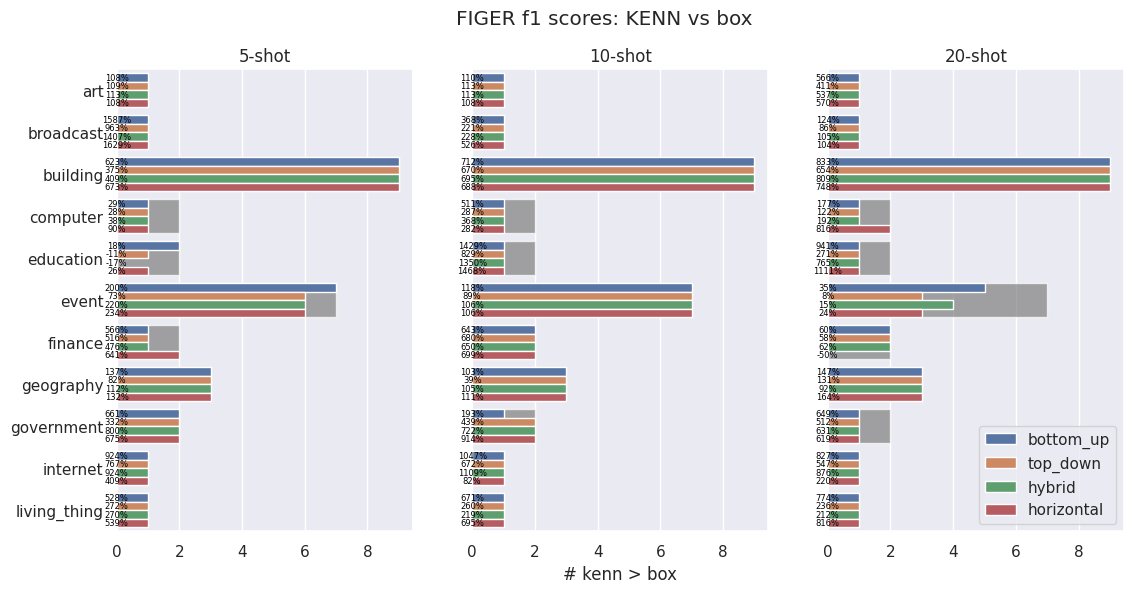

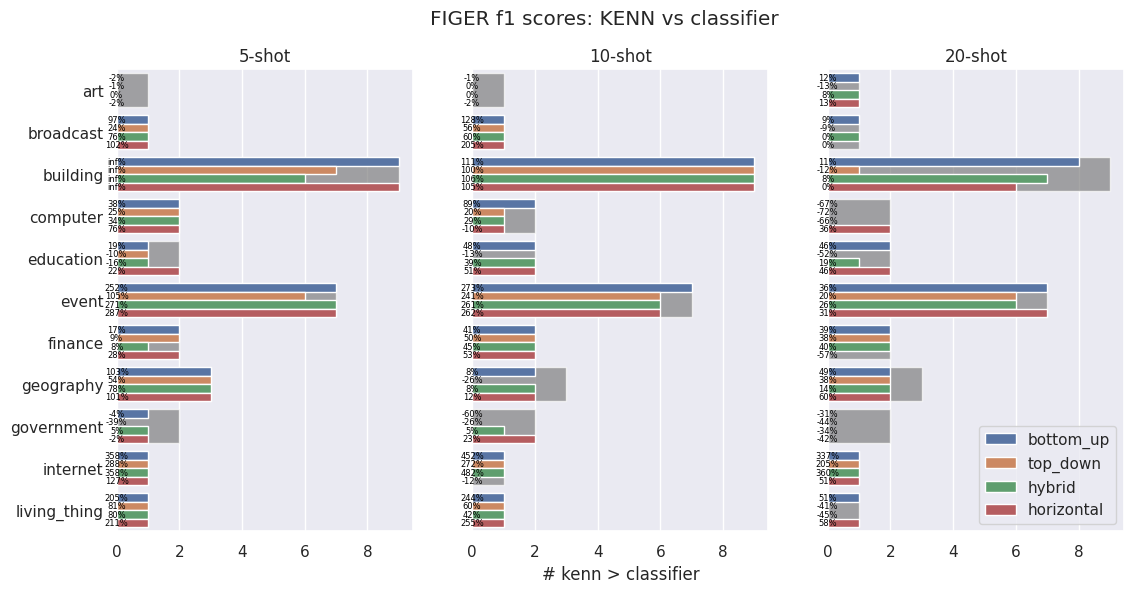

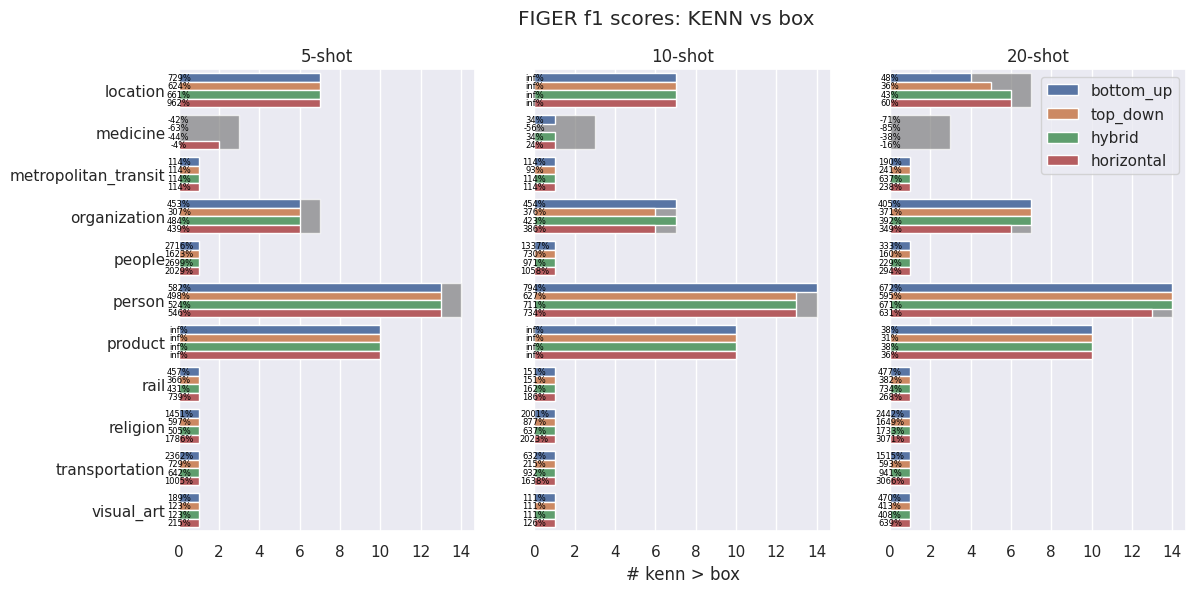

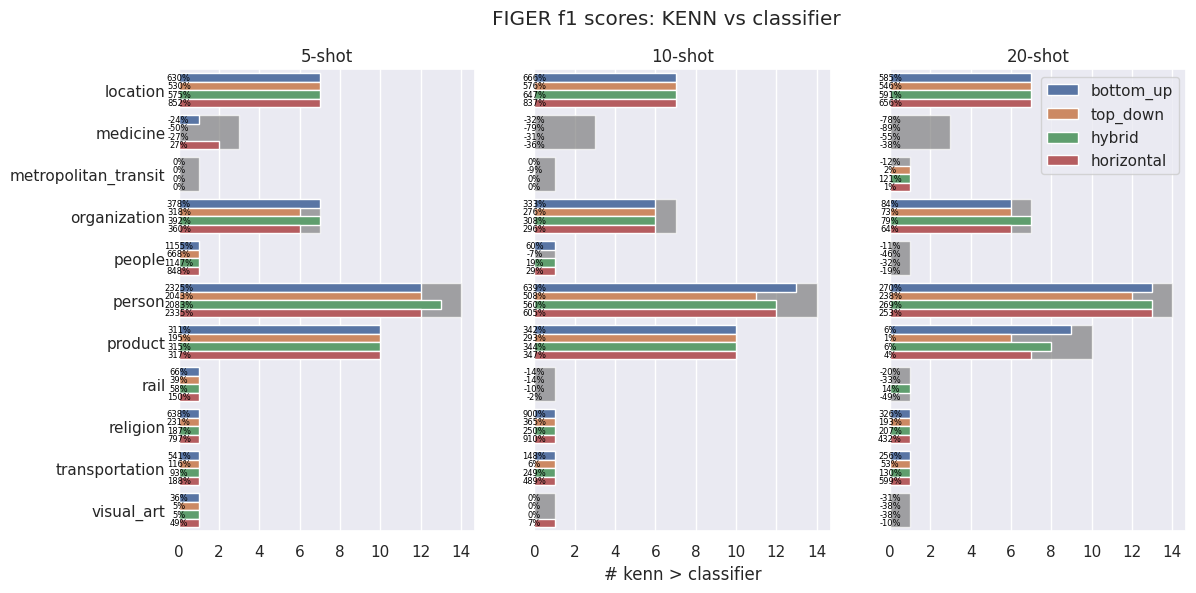

In [15]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
metric = 'f1'
figsize = (13, 6) # figer
families = sorted(list(set(df_stats['family'].values)))
n_split = len(families)//2
families_1 = families[:n_split]
families_2 = families[n_split:]
for i_family, families in enumerate([families_1, families_2]):
  df_stats_ = df_stats[df_stats['family'].isin(families)]
  for other_projector in ['box', 'classifier']:
    fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=figsize)
    suptitle = f'{TITLE[DATA]} {metric} scores: KENN vs {other_projector}'
    fig.suptitle(suptitle)
    for i, subset in enumerate(SUBSET):
      ax = axes[i]
      title = f'{int(subset/2)}-shot'
      ax.set_title(title)
      # filter df
      row_filter = {'other_projector': other_projector, 'subset': subset, 'metric': metric}
      df_stats_filtered = filter_df(df_stats_, row_filter).fillna(0)
      # plot
      bp_total = sns.barplot(data=df_stats_filtered, x='total', y='family', color='grey', alpha=.7, errorbar=None, ax=ax)
      bp_kenn_better = sns.barplot(data=df_stats_filtered, x='n_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=ax)
      # adjust
      xticks = [int(x) for x in range(max(df_stats_filtered['total'].values) + 1) if x % 2 == 0]
      bp_total.set(ylabel=None, xlabel=None, xticks=xticks)
      bp_kenn_better.set(ylabel=None, xlabel=None)
      if i == 1:
        bp_kenn_better.set(xlabel=f'# kenn > {other_projector}')
      if i == 2:
        ax.legend(title='')
        # sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
        sns.move_legend(bp_kenn_better, 'best')
      else:
        bp_kenn_better.legend_.remove()
      # # add avg perc delta on bars
      for container in bp_kenn_better.containers[1:]:
        kenn_projector_label = container.get_label()
        perc_deltas = []
        for f in families:
          perc_delta = filter_df(df_stats_filtered, {'kenn_projector': kenn_projector_label, 'family': f})['perc_delta'].max()
          if perc_delta == float('inf'):
            perc_deltas.append('inf')
          else:
            perc_deltas.append(int(perc_delta))
        
        for idx, bar in enumerate(container.get_children()):
          xy = bar.get_xy()
          # xy = (xy[0] + bar.get_width() + .6, xy[1] + bar.get_height() + .12)
          xy = (xy[0], xy[1] + bar.get_height() + .105)
          ax.annotate(f'{perc_deltas[idx]}%',
                          fontsize=6,
                          color='black',
                          xy=xy,
                          xytext=(0, 3), # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom')
    filepath = os.path.join(FIGURES_PATH, 'bars_perc')
    os.makedirs(filepath, exist_ok=True)
    filepath = os.path.join(filepath, suptitle.replace(':', '_').replace(' ', '_') + f'_{i_family}')
    plt.savefig(filepath)
    plt.show()